# Lab 7: Neural networks 

In this lab we will build dense neural networks on the MNIST dataset.

Make sure you read the tutorial for this lab first.

## Load the data and create train-test splits

In [ ]:
# google collab
# !pip install "numpy>=1.26" openml --upgrade --quiet

In [4]:
# Global imports and settings
%matplotlib inline
import numpy as np
import pandas as pd
import openml as oml
import os
import matplotlib.pyplot as plt
import tensorflow.keras as keras
print("Using Keras",keras.__version__)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

Using Keras 3.9.2


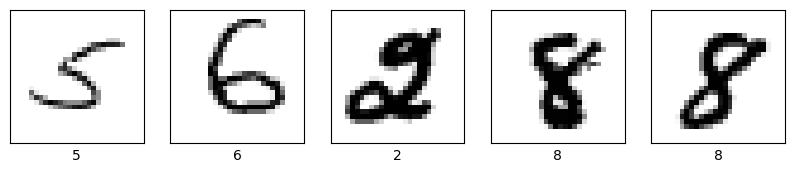

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Rest of your original code remains the same
mnist = oml.datasets.get_dataset(554)
X, y, _, _ = mnist.get_data(target=mnist.default_target_attribute, dataset_format='array')
X = X.reshape(70000, 28, 28)

# Take some random examples
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X[n], cmap=plt.cm.gray_r)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel("{}".format(y[n]))
plt.show();

In [7]:
# For MNIST, there exists a predefined stratified train-test split of 60000-10000. We therefore don't shuffle or stratify here.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, random_state=0)

## Exercise 1: Preprocessing
* Normalize the data: map each feature value from its current representation (an integer between 0 and 255) to a floating-point value between 0 and 1.0. 
* Store the floating-point values in `x_train_normalized` and `x_test_normalized`.
* Map the class label to a on-hot-encoded value. Store in `y_train_encoded` and `y_test_encoded`.

In [9]:
# Solution
x_train_normalized = X_train / 255.0
x_test_normalized = X_test / 255.0

from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Exercise 2: Create a deep neural net model

Implement a `create_model` function which defines the topography of the deep neural net, specifying the following:

* The number of layers in the deep neural net: Use 2 dense layers for now.
* The number of nodes in each layer: these are parameters of your function.
* Any regularization layers. Add at least one dropout layer.
* The optimizer and learning rate. Make the learning rate a parameter of your function as well.

Consider:
* What should be the shape of the input layer?
* Which activation function you will need for the last layer, since this is a 10-class classification problem?

In [ ]:
### Create and compile a 'deep' neural net
def create_model(layer_1_units=32, layer_2_units=10, learning_rate=0.001, dropout_rate=0.3):
    pass

In [ ]:
def create_model(layer_1_units=32, layer_2_units=10, learning_rate=0.001, dropout_rate=0.3):
    model = keras.models.Sequential()
    
    # Flatten 28x28 input
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    
    # First hidden layer
    model.add(keras.layers.Dense(units=32, activation='relu'))
    
    # Dropout layer
    model.add(keras.layers.Dropout(rate=dropout_rate))
    
    # Output layer
    model.add(keras.layers.Dense(units=10, activation='softmax'))
    
    # Compile model 
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),  # Fixed parameter name
        loss="categorical_crossentropy", 
        metrics=['accuracy']
    )
    
    return model

## Exercise 3: Create a training function
Implement a `train_model` function which trains and evaluates a given model.
It should do a train-validation split and report the train and validation loss and accuracy, and return the training history.

In [ ]:
def train_model(model, X, y, validation_split=0.1, epochs=10, batch_size=None):
    """
    model: the model to train
    X, y: the training data and labels
    validation_split: the percentage of data set aside for the validation set
    epochs: the number of epochs to train for
    batch_size: the batch size for minibatch SGD
    """
    pass

In [ ]:
# Solution
def train_model(model, X, y, validation_split=0.1, epochs=10, batch_size=None):
    """
    model: the model to train
    X, y: the training data and labels
    validation_split: the percentage of data set aside for the validation set
    epochs: the number of epochs to train for
    batch_size: the batch size for minibatch SGD
    """
    X_train, x_val, y_train, y_val = train_test_split(X, y, test_size=validation_split, shuffle=True, stratify=y, random_state=0)
    
    history = model.fit(x=X_train, y=y_train, batch_size=batch_size, verbose=0,
                        epochs=epochs, shuffle=True, validation_data=(x_val, y_val))
    return history 

## Exercise 4: Evaluate the model

Train the model with a learning rate of 0.003, 50 epochs, batch size 4000, and a validation set that is 20% of the total training data.
Use default settings otherwise. Plot the learning curve of the loss, validation loss, accuracy, and validation accuracy. Finally, report the performance on the test set.

Feel free to use the plotting function below, or implement the callback from the tutorial to see results in real time.

In [ ]:
# Helper plotting function
#
# history: the history object returned by the fit function
# list_of_metrics: the metrics to plot
def plot_curve(history, list_of_metrics):
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m, lw=2)

    plt.legend()

In [ ]:
# Solution
# Settings
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Create the model the model's topography.
model = create_model(learning_rate)

# Train the model on the normalized training set.
history = train_model(model, x_train_normalized, y_train_encoded, 
                      validation_split, epochs, batch_size)

# Plot a graph of the metric vs. epochs.
list_of_metrics = ['accuracy','val_accuracy','loss','val_loss']
plot_curve(history, list_of_metrics)

# Evaluate against the test set.
print("\n Evaluation on the test set [loss, accuracy]:")
model.evaluate(x=x_test_normalized, y=y_test_encoded, 
               batch_size=batch_size, verbose=0)

## Exercise 5: Optimize the model

Try to optimize the model, either manually or with a tuning method. At least optimize the following:
* the number of hidden layers 
* the number of nodes in each layer
* the amount of dropout layers and the dropout rate

Try to reach at least 96% accuracy against the test set.

In [ ]:
# Solution
# For an example with random search, see the tutorial
# Here, we search manually, following the following hunches:
#   * Adding more nodes to the first hidden layer will improve accuracy. The input size is 784, so we should not make it too small
#   * Adding a second hidden layer generally improves accuracy.
#   * For larger models (more nodes), we need to regularize more (more dropout)

batch_size = 4000 # Pretty high, but making this smaller doesn't seem to help much.
epochs = 70

# Create the model the model's topography.
model = create_model(layer_1_units=800, layer_2_units=800, learning_rate=0.003, dropout_rate= 0.15)

# Train the model on the normalized training set.
history = train_model(model, x_train_normalized, y_train_encoded, 
                      validation_split, epochs, batch_size)

# Plot a graph of the metric vs. epochs.
list_of_metrics = ['accuracy','val_accuracy','loss','val_loss']
plot_curve(history, list_of_metrics)

# Evaluate against the test set.
print("\n Evaluation on the test set (accuracy):")
model.evaluate(x=x_test_normalized, y=y_test_encoded, 
               batch_size=batch_size, verbose=0)[1]

In [ ]:
import keras
import keras_tuner as kt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.Input(shape=(28, 28)))
    model.add(layers.Flatten())

    # 1ère couche dense
    model.add(layers.Dense(
        units=hp.Int('units1', 64, 256, step=32),
        activation='relu'
    ))
    model.add(layers.Dropout(rate=hp.Float('dropout1', 0.1, 0.5, step=0.1)))

    # 2e couche dense
    model.add(layers.Dense(
        units=hp.Int('units2', 32, 256, step=32),
        activation=hp.Choice('activation', ['relu', 'tanh', 'selu'])
    ))

    # 3e couche dense (optionnelle)
    if hp.Boolean('add_layer3'):
        model.add(layers.Dense(
            units=hp.Int('units3', 32, 128, step=32),
            activation='relu'
        ))

    # Couche de sortie avec softmax pour classification
    model.add(layers.Dense(10, activation='softmax'))

    # Optimiseur avec LR
    optimizer = keras.optimizers.Adam(
        learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])
    )

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Séparer les données
X_train, X_val, y_train, y_val = train_test_split(
    x_train_normalized,
    y_train_encoded,
    test_size=0.1,
    shuffle=True,
    stratify=y_train_encoded,
    random_state=0
)

# Recherche aléatoire avec 20 essais
tuner = kt.RandomSearch(
    build_model,
    max_trials=5,
    objective='val_accuracy',
    project_name='mnist_advanced_tuning',
    overwrite=True
)

# Lancer la recherche
tuner.search(
    X_train, y_train,
    epochs=30,
    validation_data=(X_val, y_val),
    verbose=1
)

# Récupérer le meilleur modèle
best_model = tuner.get_best_models(num_models=1)[0]

# Évaluer
loss, accuracy = best_model.evaluate(X_val, y_val)
print(f"\n✅ Meilleure accuracy sur validation : {accuracy:.4f}")

Trial 5 Complete [00h 01m 35s]
val_accuracy: 0.9683333039283752

Best val_accuracy So Far: 0.981333315372467
Total elapsed time: 00h 07m 34s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
224               |192               |units1
0.3               |0.3               |dropout1
160               |160               |units2
selu              |selu              |activation
False             |True              |add_layer3
0.0001            |0.0001            |lr
32                |32                |units3

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7532 - loss: 0.8562 - val_accuracy: 0.9268 - val_loss: 0.2467
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9239 - loss: 0.2588 - val_accuracy: 0.9488 - val_loss: 0.1750
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9438 - loss: 0.1900 - val_accuracy: 0.9568 - val_loss: 0.1410
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0

In [ ]:
print(f"Meilleur nombre de neurones (1ère couche dense) : {best_model.get('units')}")
print(f"Meilleur nombre de neurones (2ème couche dense) : {best_model.get('units2')}")
print(f"Meilleur taux de dropout : {best_model.get('dropout')}")


Meilleur nombre de neurones (1ère couche dense) : 192
Meilleur nombre de neurones (2ème couche dense) : 96
Meilleur taux de dropout : 0.4


In [ ]:
best_model = tuner.hypermodel.build(best_model)
best_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 192)            │       150,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 96)             │        18,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,218 (664.91 KB)

 Trainable params: 170,218 (664.91 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
import pandas as pd

results = tuner.oracle.trials

df = pd.DataFrame([
    {
        'Trial ID': trial.trial_id,
        'Val Accuracy': trial.score,
        **trial.hyperparameters.values
    }
    for trial in results.values()
])

df


,Trial ID,Val Accuracy,units,units2,dropout
0,0,0.218667,192,96,0.4
1,1,0.217500,96,32,0.4
2,2,0.139333,32,160,0.1
3,3,0.139333,224,32,0.3
4,4,0.184667,128,256,0.2


In [16]:
best_model.save("best_mnist_model.h5")


In [17]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

# Charger une image aléatoire depuis x_test (normalisé)
def show_prediction(index):
    image = x_test_normalized[index]
    label = np.argmax(y_test_encoded[index])  # Ground truth

    plt.imshow(image, cmap='gray')
    plt.title(f"Vraie étiquette : {label}")
    plt.axis('off')
    plt.show()

    # Prédiction
    prediction = best_model.predict(image[np.newaxis, ...])
    predicted_label = np.argmax(prediction)
    
    print(f"✅ Prédiction du modèle : {predicted_label}")

# Slider pour choisir une image
index_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(x_test_normalized)-1,
    step=1,
    description='Image #:',
    continuous_update=False
)

# Affichage interactif
widgets.interact(show_prediction, index=index_slider)


interactive(children=(IntSlider(value=0, continuous_update=False, description='Image #:', max=9999), Output())…

<function __main__.show_prediction(index)>